Accuracy:  0.9558823529411765 

Recall Score:  0.92 

Precision Score:  0.9583333333333334 

F1 Score:  0.9387755102040817 

Specificity:  0.9767441860465116 

Confustion matrix:
 [[42  1]
 [ 2 23]] 



[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

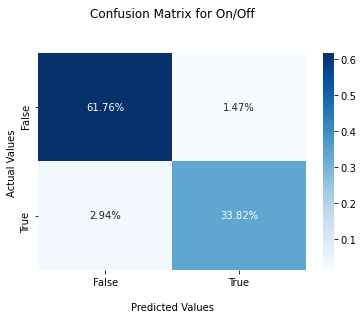

In [2]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#import joblib
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#importing the dataset and splitting it into training and testing data
dataset = pd.read_csv('trainingDataset1week.csv')
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has on/off
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#training the K neighbours classsifier
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train.values.ravel())

#predicting with the trained model
prediction1 = model1.predict(X_test)

#accuracy
score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

#recall
recallScore = recall_score(y_test, prediction1)
print ("Recall Score: ", recallScore,"\n")

#precision
precisionScore = precision_score(y_test, prediction1)
print ("Precision Score: ", precisionScore,"\n")

#f1score
f1score = f1_score(y_test, prediction1)
print ("F1 Score: ", f1score,"\n")

#specificity
tn, fp, fn, tp = confusion_matrix(y_test, prediction1).ravel()
specificity = tn / (tn+fp)
print("Specificity: ", specificity,"\n")

#confusion matrix
cf_matrix = confusion_matrix(y_test, prediction1)
print("Confustion matrix:\n", cf_matrix,"\n")

#visualizing the confusion matrix 
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for On/Off\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

K Neighbours: AUROC = 0.989 



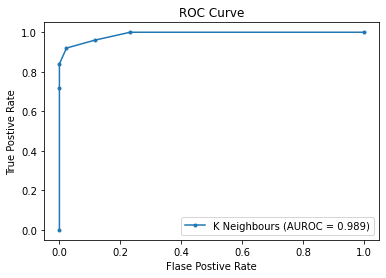

In [3]:
#AUROC score
dt_probs = model1.predict_proba(X_test)
dt_probs = dt_probs[:,1]
dt_auc = roc_auc_score(y_test, dt_probs)
print("K Neighbours: AUROC = %.3f \n" %(dt_auc))

#visualizing the ROC curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
plt.plot(dt_fpr, dt_tpr, marker=".", label="K Neighbours (AUROC = %0.3f)" % dt_auc)
plt.title("ROC Curve")
plt.xlabel("Flase Postive Rate")
plt.ylabel("True Postive Rate")
plt.legend()
plt.show()

Accuracy:  0.75 

Recall Score:  0.75 

Precision Score:  0.8118024132730014 

F1 Score:  0.734468787515006 

Confustion matrix:
 [[11  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  2  0  0  0  0]
 [ 0  1  0 23  2  0  0]
 [ 0  0  2  0  8  1  0]
 [ 0  0  2  0  3  2  6]
 [ 0  0  0  0  0  0  4]] 



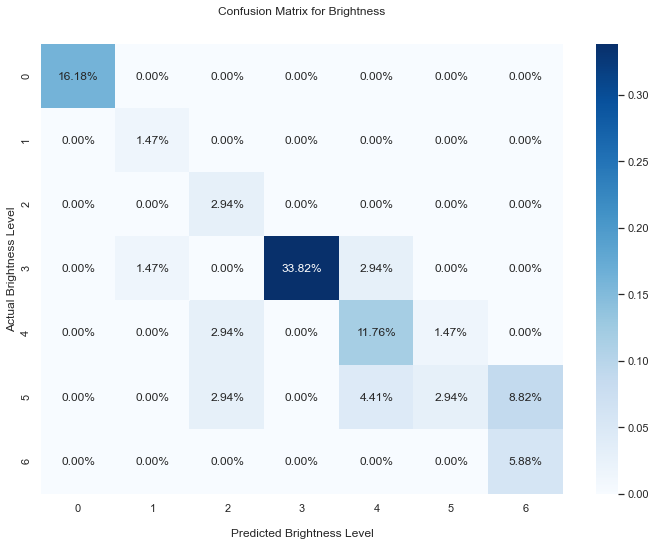

In [13]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Color temp (x*1000)Kelvin']) #only has brightness
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#train the model
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train.values.ravel())

#predict with the model
prediction1 = model1.predict(X_test)

#accuracy
score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

#recall
recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

#precision
precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

#f1score
f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

#confusion matrix
cf_matrix = confusion_matrix(y_test, prediction1)
print("Confustion matrix:\n", cf_matrix,"\n")

#visualizing the confusion matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Brightness\n\n');
ax.set_xlabel('\nPredicted Brightness Level')
ax.set_ylabel('Actual Brightness Level');

Accuracy:  0.6911764705882353 

Recall Score:  0.6911764705882353 

Precision Score:  0.7200009549274256 

F1 Score:  0.6960910005027652 

Confustion matrix:
 [[ 5  0  0  0  0  0  0]
 [ 0 16  3  0  0  1  0]
 [ 0  0  0  1  4  1  0]
 [ 0  0  0  7  0  3  0]
 [ 1  0  0  2  3  1  0]
 [ 0  0  1  0  1  4  0]
 [ 1  0  0  1  0  0 12]] 



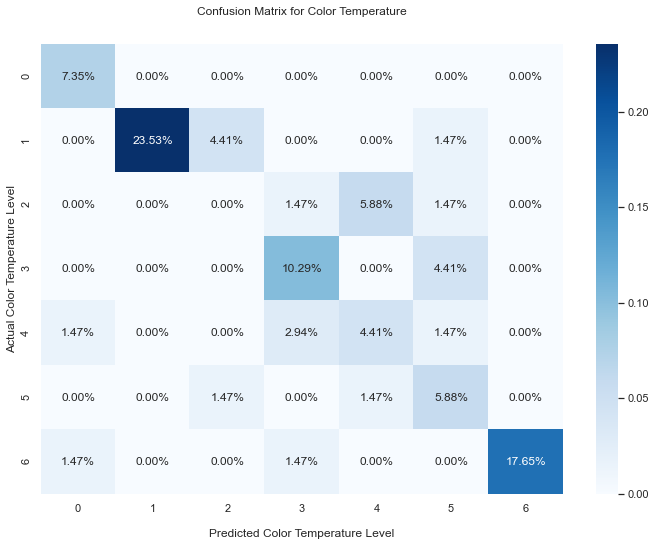

In [14]:
X = dataset.drop(columns=['On/Off', 'Brightness (x*10)%', 'Color temp (x*1000)Kelvin']) #only has time
y = dataset.drop(columns=['Time', 'On/Off', 'Brightness (x*10)%']) #only has color temperature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

#train the model
model1 = KNeighborsClassifier()
model1.fit(X_train, y_train.values.ravel())

#predict with the model
prediction1 = model1.predict(X_test)

#accuracy
score = accuracy_score(y_test, prediction1)
print("Accuracy: ", score,"\n")

#recall
recallScore = recall_score(y_test, prediction1, average="weighted")
print ("Recall Score: ", recallScore,"\n")

#precision
precisionScore = precision_score(y_test, prediction1, average="weighted")
print ("Precision Score: ", precisionScore,"\n")

#f1score
f1score = f1_score(y_test, prediction1, average="weighted")
print ("F1 Score: ", f1score,"\n")

#confusion matrix
cf_matrix = confusion_matrix(y_test, prediction1)
print("Confustion matrix:\n", cf_matrix,"\n")

#visualizing the confusion matrix
sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix for Color Temperature\n\n');
ax.set_xlabel('\nPredicted Color Temperature Level')
ax.set_ylabel('Actual Color Temperature Level');